# Forecasting Unemployment using ARIMA

### Import Libraries and Read File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data =pd.read_csv('Clean_Dataset.csv')
data.head()

,Date,Month,Labour Force,Employment,Unemployment,Beneficiaries,Unemployment_Rate
0,1997-01-01,January,14677800,13162900,1514500,689660,0.103250
1,1997-02-01,February,14743400,13230600,1512600,678560,0.102208
2,1997-03-01,March,14780700,13304800,1476100,667350,0.102304
3,1997-04-01,April,14828500,13371100,1457700,662150,0.102792
4,1997-05-01,May,15185900,13748300,1437700,666020,0.095392


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               300 non-null    object 
 1   Month              300 non-null    object 
 2   Labour Force       300 non-null    int64  
 3   Employment         300 non-null    int64  
 4   Unemployment       300 non-null    int64  
 5   Beneficiaries      300 non-null    int64  
 6   Unemployment_Rate  300 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


In [4]:
data.columns

Index(['Date', 'Month', 'Labour Force', 'Employment', 'Unemployment',
       'Beneficiaries', 'Unemployment_Rate'],
      dtype='object')

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Labour Force,300.0,1.801526e+07,1.586419e+06,1.467780e+07,1.685815e+07,1.826545e+07,1.926750e+07,2.089040e+07
Employment,300.0,1.671282e+07,1.536781e+06,1.316290e+07,1.557738e+07,1.690465e+07,1.789235e+07,1.940140e+07
Unemployment,300.0,1.302434e+06,2.276459e+05,9.541000e+05,1.156950e+06,1.268250e+06,1.406125e+06,2.672300e+06
Beneficiaries,300.0,5.960918e+05,2.013139e+05,2.137500e+05,5.153725e+05,5.496200e+05,5.939350e+05,1.678060e+06
Unemployment_Rate,300.0,8.172857e-02,1.021026e-02,6.066923e-02,7.442692e-02,8.079038e-02,8.787115e-02,1.312192e-01


### Missing Values 

In [6]:
data.isnull().sum()

Date                 0
Month                0
Labour Force         0
Employment           0
Unemployment         0
Beneficiaries        0
Unemployment_Rate    0
dtype: int64

#### Visualizing missing data

Text(0.5, 1.0, 'Missing Data in EI beneficiary dataset')

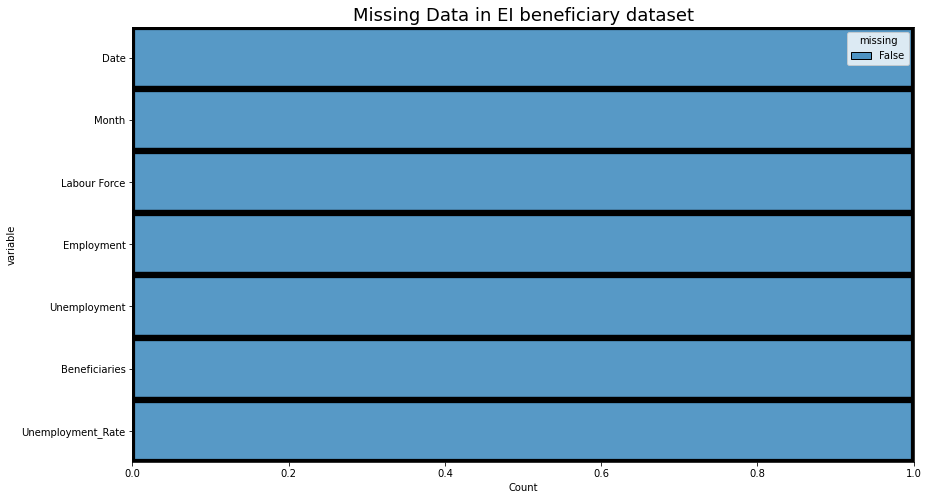

In [7]:
plt.figure(figsize=(14,8))
sns.histplot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    #aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)
plt.title('Missing Data in EI beneficiary dataset', fontsize=18)


### Exploratory Data Analysis (Visualisation)

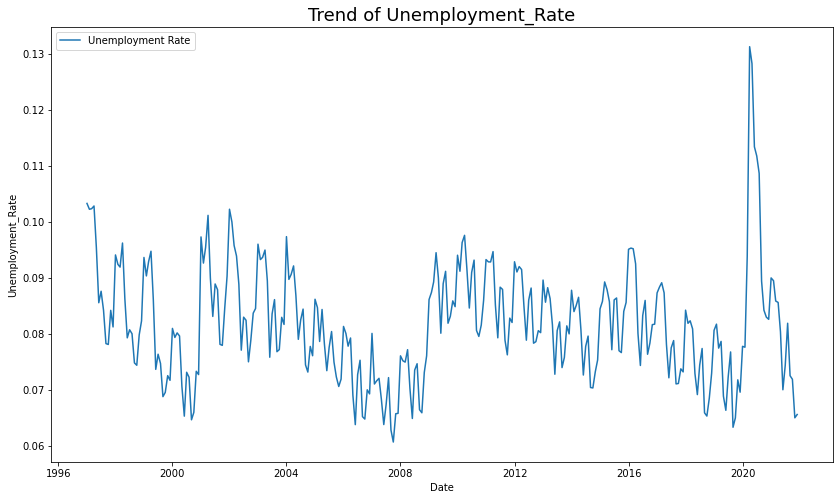

In [9]:
data['Date'] =  pd.to_datetime(data['Date'])
plt.figure(figsize=(14,8))
sns.lineplot(data=data, x='Date',y='Unemployment_Rate')
plt.title('Trend of Unemployment_Rate', fontsize=18)
plt.ylabel('Unemployment_Rate')
plt.legend(labels=['Unemployment Rate'])

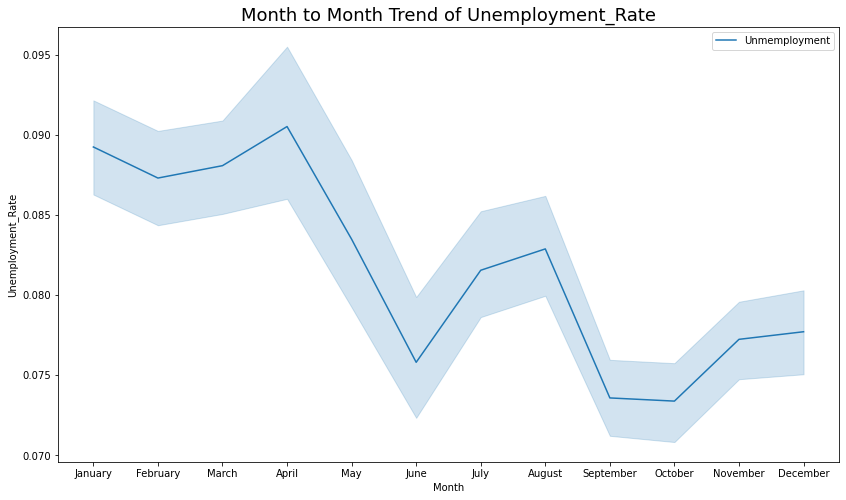

In [10]:
plt.figure(figsize=(14,8))
sns.lineplot(data=data, x='Month',y='Unemployment_Rate')
plt.title('Month to Month Trend of Unemployment_Rate', fontsize=18)
plt.ylabel('Unemployment_Rate')
plt.legend(labels=['Unmemployment'])

In [20]:
#plt.figure(figsize=(14,8))
#sns.lineplot(data=data, x='Year',y='Unemployment_Rate')
#plt.title('Year to Year Trend of Unemployment_Rate', fontsize=18)
#plt.ylabel('Unemployment_Rate')
#plt.legend(labels=['Unmemployment'])

<AxesSubplot:title={'center':'Yearly Trend of Unemployment and EI Beneficiaries'}, xlabel='Date', ylabel='Unemployment'>

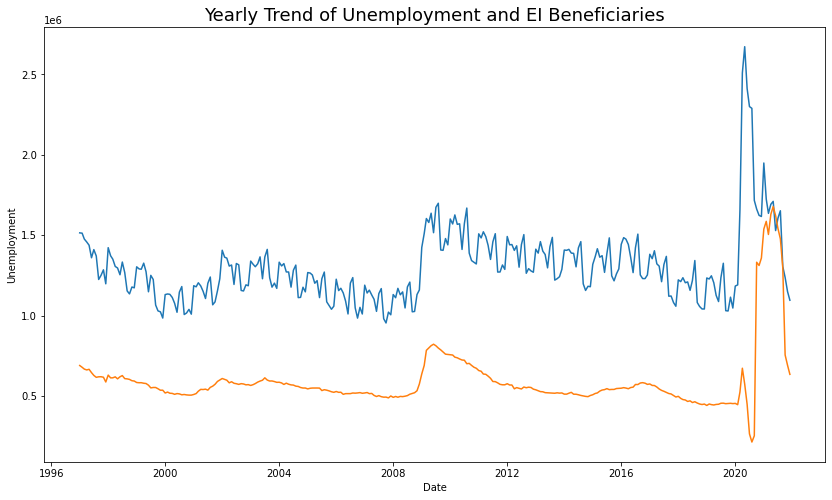

In [11]:
plt.figure(figsize=(14,8))
plt.title('Yearly Trend of Unemployment and EI Beneficiaries', fontsize=18)
sns.lineplot(data=data, x='Date',y='Unemployment')
sns.lineplot(data=data, x='Date',y='Beneficiaries')

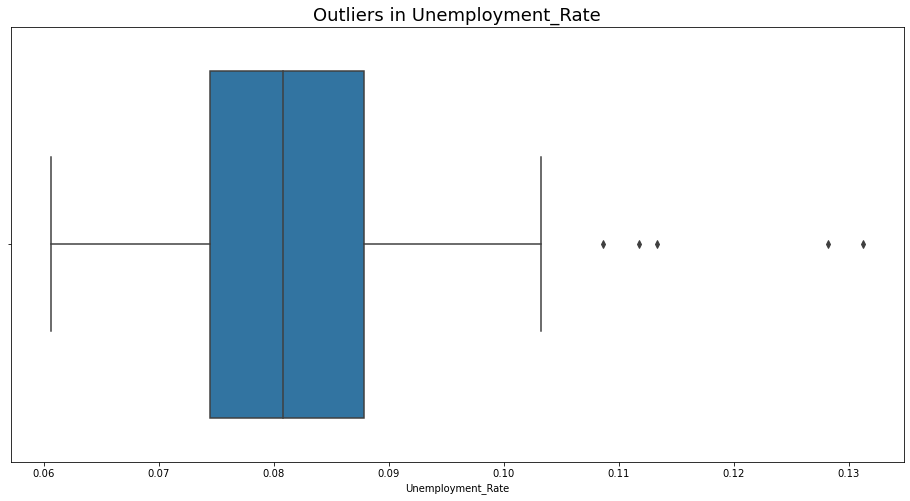

In [12]:
fig = plt.subplots(figsize=(16, 8))
plt.title('Outliers in Unemployment_Rate', fontsize=18)
ax = sns.boxplot(x=data['Unemployment_Rate'],whis=1.5)

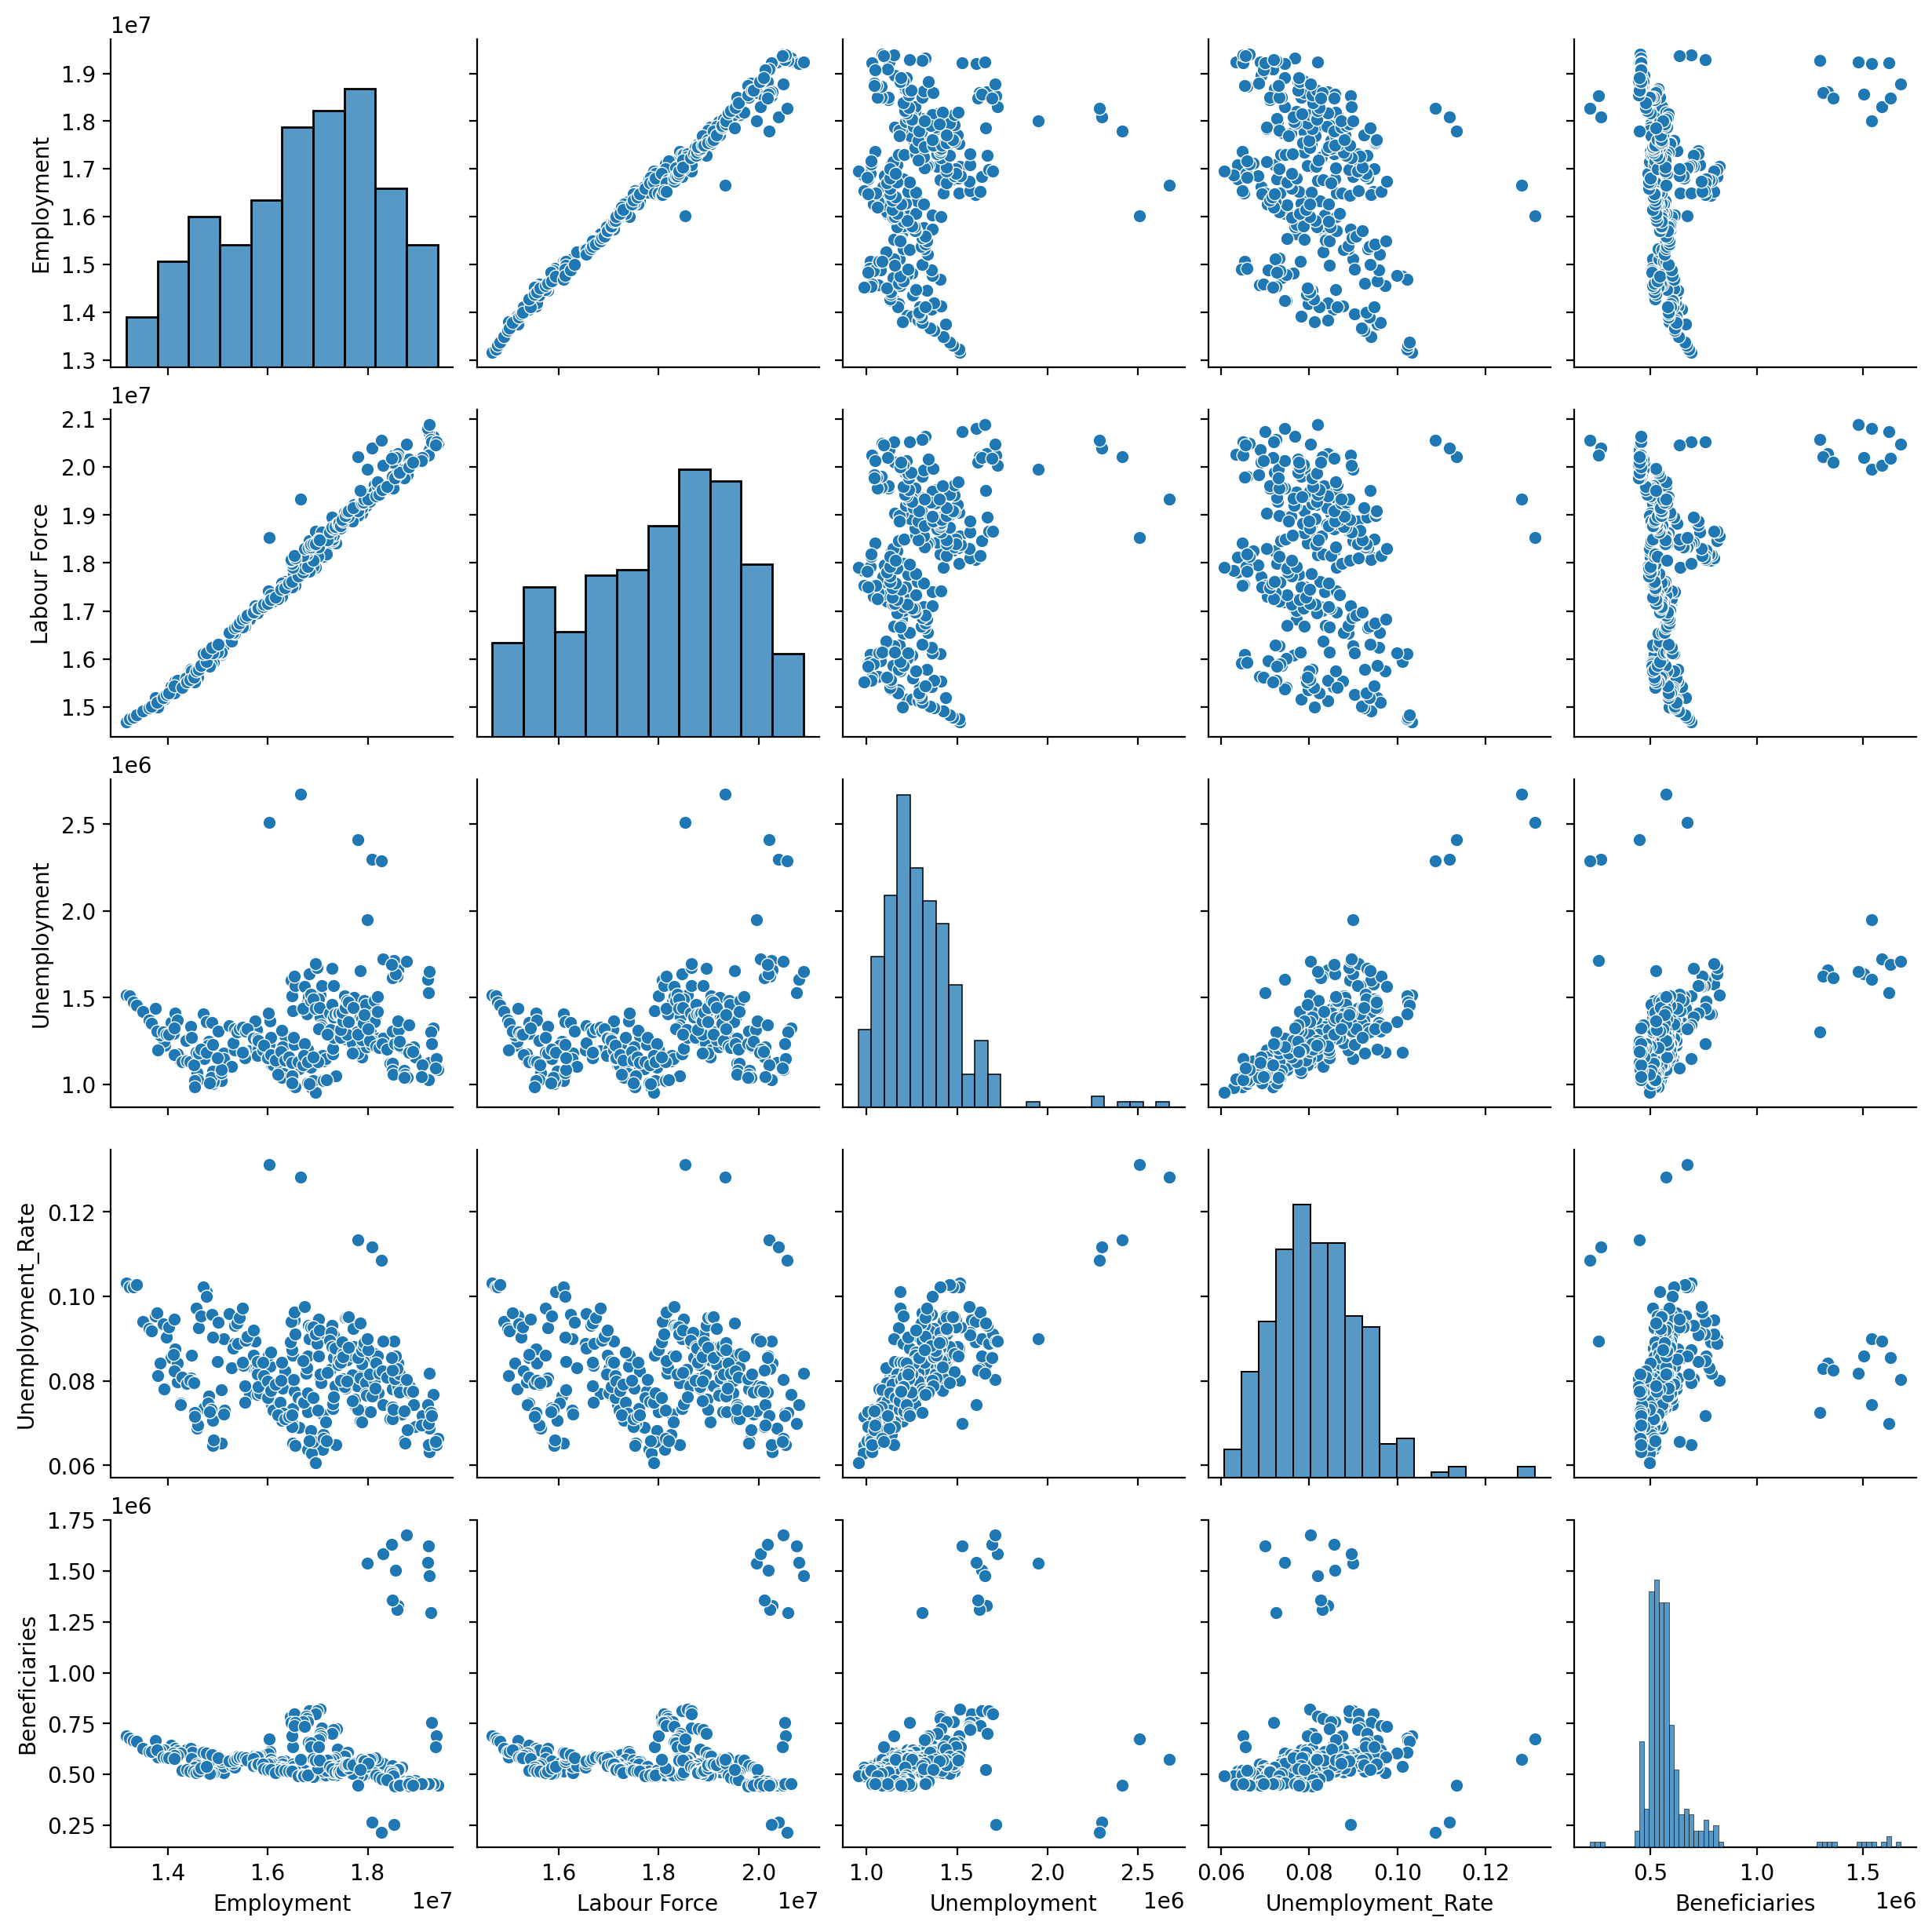

In [36]:
sns.pairplot(data[['Date','Employment','Labour Force','Unemployment', 'Unemployment_Rate','Beneficiaries']])

<BarContainer object of 8400 artists>

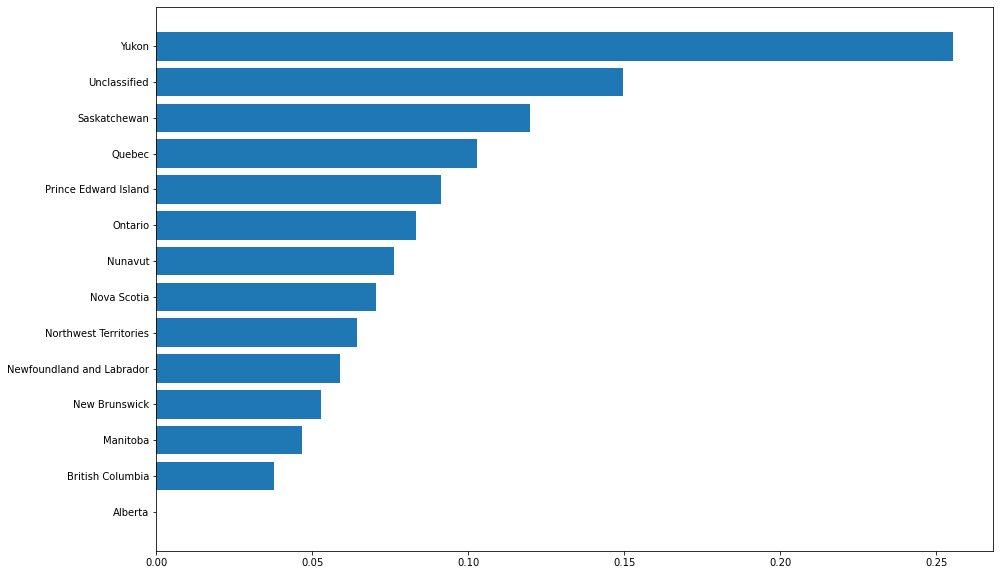

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(data['Province'], data['Unemployment_Rate'].sort_values())

### Select columns needed for Modeling

In [15]:
df= data[['Date', 'Unemployment_Rate']]

### Data Preprocessing & Cleaning

In [27]:
data.isnull().sum()

Date                 0
Unemployment_Rate    0
dtype: int64

In [18]:
data['Employment'] =  data['Employment'].fillna(data['Employment'].mean())
data['Labour Force'] =  data['Labour Force'].fillna(data['Labour Force'].mean())
data['Unemployment'] =  data['Unemployment'].fillna(data['Unemployment'].mean())
data['EI Beneficiaries'] =  data['EI Beneficiaries'].fillna(data['EI Beneficiaries'].mean())

In [19]:
data.isnull().sum()

Province              0
Year                  0
Month                 0
Year ID               0
Month ID              0
Date                  0
Beneficiary detail    0
Sex                   0
Age group             0
UOM                   0
VECTOR                0
COORDINATE            0
Latitude              0
Longitude             0
Employment            0
Labour Force          0
Unemployment          0
EI Beneficiaries      0
Unemployment_Rate     0
dtype: int64

### Encoding Categorical Data 

In [20]:
#Encoding Sex
Gender = pd.get_dummies(data['Sex'], prefix='Sex',drop_first=True)
data = pd.concat([data,Gender], axis = 1)
data.drop(columns=['Sex'], axis =1, inplace=True)
data.head()

,Province,Year,Month,Year ID,Month ID,Date,Beneficiary detail,Age group,UOM,VECTOR,COORDINATE,Latitude,Longitude,Employment,Labour Force,Unemployment,EI Beneficiaries,Unemployment_Rate,Sex_Males
0,Alberta,1997,January,1,1,01-01-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,764500.0,824200.0,59700.0,24830.0,0.0724,1
1,Alberta,1997,February,1,2,01-02-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,768400.0,826600.0,58300.0,23410.0,0.0705,1
2,Alberta,1997,March,1,3,01-03-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,776600.0,830600.0,54000.0,23200.0,0.0650,1
3,Alberta,1997,April,1,4,01-04-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,769500.0,825100.0,55700.0,20250.0,0.0675,1
4,Alberta,1997,May,1,5,01-05-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,802300.0,851300.0,48900.0,20990.0,0.0574,1


In [21]:
data['Province'].unique()

array(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Saskatchewan', 'Unclassified', 'Yukon'], dtype=object)

In [22]:
cleanup_nums = {'Province':
                {'Alberta':1,'British Columbia':2, 'Manitoba':3,'New Brunswick':4, 
                'Newfoundland and Labrador':5, 'Northwest Territories':6, 'Nunavut':7,
                'Ontario': 8, 'Prince Edward Island':9, 'Quebec':10, 'Saskatchewan':11,
                 'Unclassified':12, 'Yukon':13}}
data = data.replace(cleanup_nums)
data.head()

,Province,Year,Month,Year ID,Month ID,Date,Beneficiary detail,Age group,UOM,VECTOR,COORDINATE,Latitude,Longitude,Employment,Labour Force,Unemployment,EI Beneficiaries,Unemployment_Rate,Sex_Males
0,1,1997,January,1,1,01-01-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,764500.0,824200.0,59700.0,24830.0,0.0724,1
1,1,1997,February,1,2,01-02-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,768400.0,826600.0,58300.0,23410.0,0.0705,1
2,1,1997,March,1,3,01-03-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,776600.0,830600.0,54000.0,23200.0,0.0650,1
3,1,1997,April,1,4,01-04-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,769500.0,825100.0,55700.0,20250.0,0.0675,1
4,1,1997,May,1,5,01-05-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,802300.0,851300.0,48900.0,20990.0,0.0574,1


In [23]:
month_nums = {'Month':
                {'January':1,'February':2, 'March':3,'April':4, 
                'May':5, 'June':6, 'July':7,
                'August': 8, 'September':9, 'October':10, 'November':11,
                 'December':12}}
data = data.replace(month_nums)
data.head()

,Province,Year,Month,Year ID,Month ID,Date,Beneficiary detail,Age group,UOM,VECTOR,COORDINATE,Latitude,Longitude,Employment,Labour Force,Unemployment,EI Beneficiaries,Unemployment_Rate,Sex_Males
0,1,1997,1,1,1,01-01-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,764500.0,824200.0,59700.0,24830.0,0.0724,1
1,1,1997,2,1,2,01-02-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,768400.0,826600.0,58300.0,23410.0,0.0705,1
2,1,1997,3,1,3,01-03-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,776600.0,830600.0,54000.0,23200.0,0.0650,1
3,1,1997,4,1,4,01-04-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,769500.0,825100.0,55700.0,20250.0,0.0675,1
4,1,1997,5,1,5,01-05-1997,Regular benefits,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,802300.0,851300.0,48900.0,20990.0,0.0574,1


### Select  Features needed for Modeling

In [24]:
df= data[['Province','Date','Labour Force','Employment','Unemployment','EI Beneficiaries','Unemployment_Rate']]
df.head(10)

,Province,Date,Labour Force,Employment,Unemployment,EI Beneficiaries,Unemployment_Rate
0,1,01-01-1997,824200.0,764500.0,59700.0,24830.0,0.0724
1,1,01-02-1997,826600.0,768400.0,58300.0,23410.0,0.0705
2,1,01-03-1997,830600.0,776600.0,54000.0,23200.0,0.0650
3,1,01-04-1997,825100.0,769500.0,55700.0,20250.0,0.0675
4,1,01-05-1997,851300.0,802300.0,48900.0,20990.0,0.0574
5,1,01-06-1997,858900.0,818300.0,40600.0,20680.0,0.0473
6,1,01-07-1997,874500.0,823500.0,51100.0,20300.0,0.0584
7,1,01-08-1997,875300.0,833300.0,42000.0,20370.0,0.0480
8,1,01-09-1997,856300.0,822400.0,34000.0,20290.0,0.0397
9,1,01-10-1997,861400.0,822100.0,39300.0,19930.0,0.0456


In [25]:
#Convert Date column from int to year
df['Date'] =  pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Province           8400 non-null   object        
 1   Date               8400 non-null   datetime64[ns]
 2   Labour Force       8400 non-null   float64       
 3   Employment         8400 non-null   float64       
 4   Unemployment       8400 non-null   float64       
 5   EI Beneficiaries   8400 non-null   float64       
 6   Unemployment_Rate  8400 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 459.5+ KB


<ipython-input-25-59b7e0002d58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] =  pd.to_datetime(df['Date'])


In [16]:
df.tail()

,Date,Unemployment_Rate
295,2021-08-01,0.081865
296,2021-09-01,0.072504
297,2021-10-01,0.071865
298,2021-11-01,0.064992
299,2021-12-01,0.065581


In [17]:
#Setting Date as index
df1 = df.set_index('Date')
df1


,Unemployment_Rate
Date,
1997-01-01,0.103250
1997-02-01,0.102208
1997-03-01,0.102304
1997-04-01,0.102792
1997-05-01,0.095392
...,...
2021-08-01,0.081865
2021-09-01,0.072504
2021-10-01,0.071865


### Testing which features are Stationary

In [28]:
#Testing whether Unemployment  is Stationary
from statsmodels.tsa.stattools import adfuller
print('p-value:', adfuller(df1['Employment'].dropna())[1]) # Unemployment is under 0.05 henece stationary data

p-value: 0.017397104626418792


In [29]:
#Testing whether Unemployment  is Stationary
from statsmodels.tsa.stattools import adfuller
print('p-value:', adfuller(df1['Unemployment'].dropna())[1]) # Unemployment is under 0.05 henece stationary data

p-value: 0.004593116103418782


In [18]:
from statsmodels.tsa.stattools import adfuller
print('p-value:', adfuller(df1['Unemployment_Rate'].dropna())[1]) # Here we see unemployment is under 0.05 so also stationary data

p-value: 0.00047961522745986623


In [19]:
from statsmodels.graphics.tsaplots import plot_acf

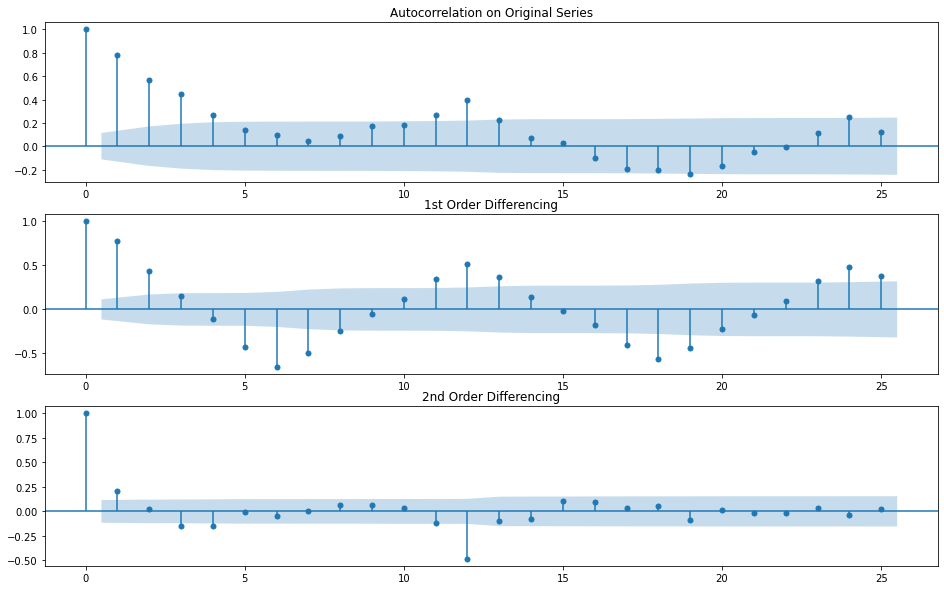

In [20]:
fig = plt.figure(figsize=(16, 10))
ax1 =fig.add_subplot(311)
fig =plot_acf(df1['Unemployment_Rate'],
             ax= ax1,
             title='Autocorrelation on Original Series')
ax2 =fig.add_subplot(312)
fig =plot_acf(df1['Unemployment_Rate'].diff(6).dropna(),
             ax= ax2,
             title='1st Order Differencing')
ax3 =fig.add_subplot(313)
fig =plot_acf(df1['Unemployment_Rate'].diff().diff(12).dropna(),
             ax= ax3,
             title='2nd Order Differencing')

In [21]:
df1['UnemploymentRate2'] = df1['Unemployment_Rate'].diff().diff(12)
df1.head()

,Unemployment_Rate,UnemploymentRate2
Date,,
1997-01-01,0.103250,NaN
1997-02-01,0.102208,NaN
1997-03-01,0.102304,NaN
1997-04-01,0.102792,NaN
1997-05-01,0.095392,NaN


### Building ARIMA Model

In [22]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import statsmodels.api as sm 
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error 

Text(0, 0.5, 'Unemployment_Rate')

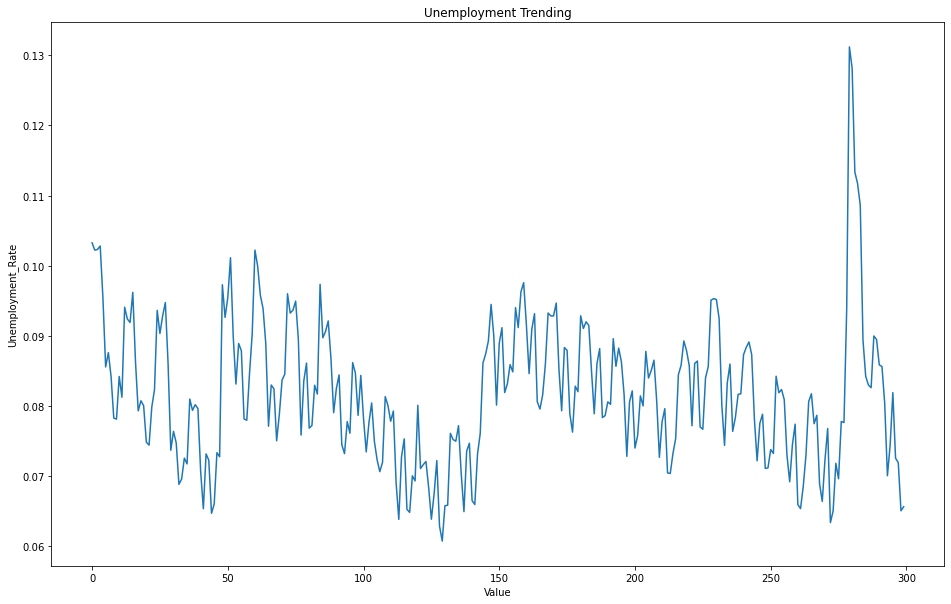

In [23]:
plt.title('Unemployment Trending')
df['Unemployment_Rate'].plot(figsize=(16,10))
plt.xlabel('Value')
plt.ylabel('Unemployment_Rate')

In [24]:
#NonSeasonal ARIMA mODLE
model_111 = ARIMA(df1['Unemployment_Rate'], order=(1,1,1))
model_111_fit = model_111.fit(disp = 0)
print(model_111_fit.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.Unemployment_Rate   No. Observations:                  299
Model:                  ARIMA(1, 1, 1)   Log Likelihood                1085.727
Method:                        css-mle   S.D. of innovations              0.006
Date:                 Mon, 04 Apr 2022   AIC                          -2163.454
Time:                         21:02:09   BIC                          -2148.652
Sample:                     02-01-1997   HQIC                         -2157.530
                          - 12-01-2021                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0001      0.000     -0.305      0.760      -0.001       0.001
ar.L1.D.Unemployment_Rate    -0.5424      0.107     -5.057      0.000      -0.

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferr

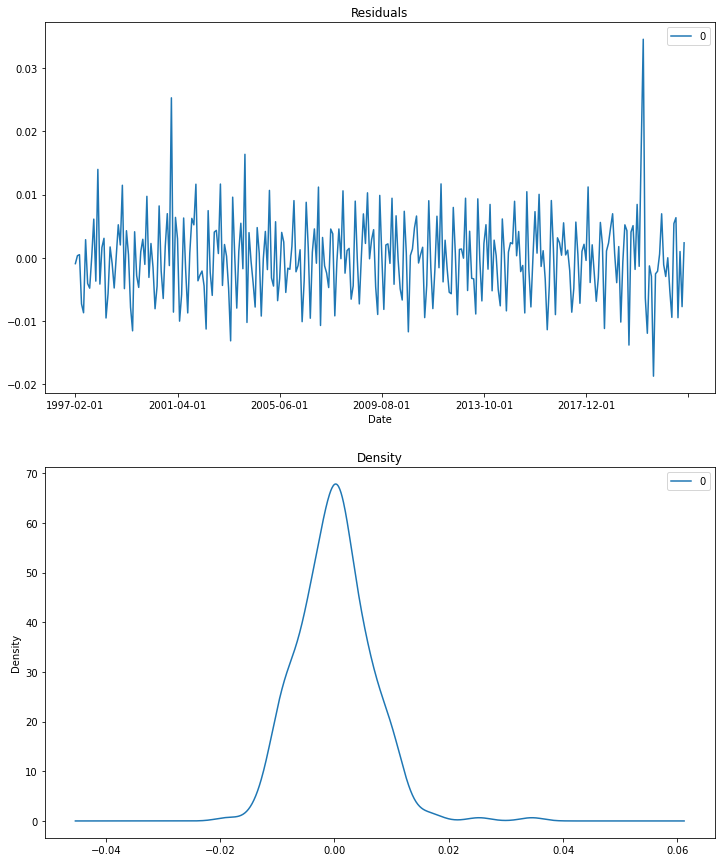

In [40]:
#Plotting Residual Errors
residuals_111 =pd.DataFrame(model_111_fit.resid)
fig, ax =plt.subplots(2,1)
residuals_111.plot(title='Residuals', ax= ax[0], figsize=(12,15))
residuals_111.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

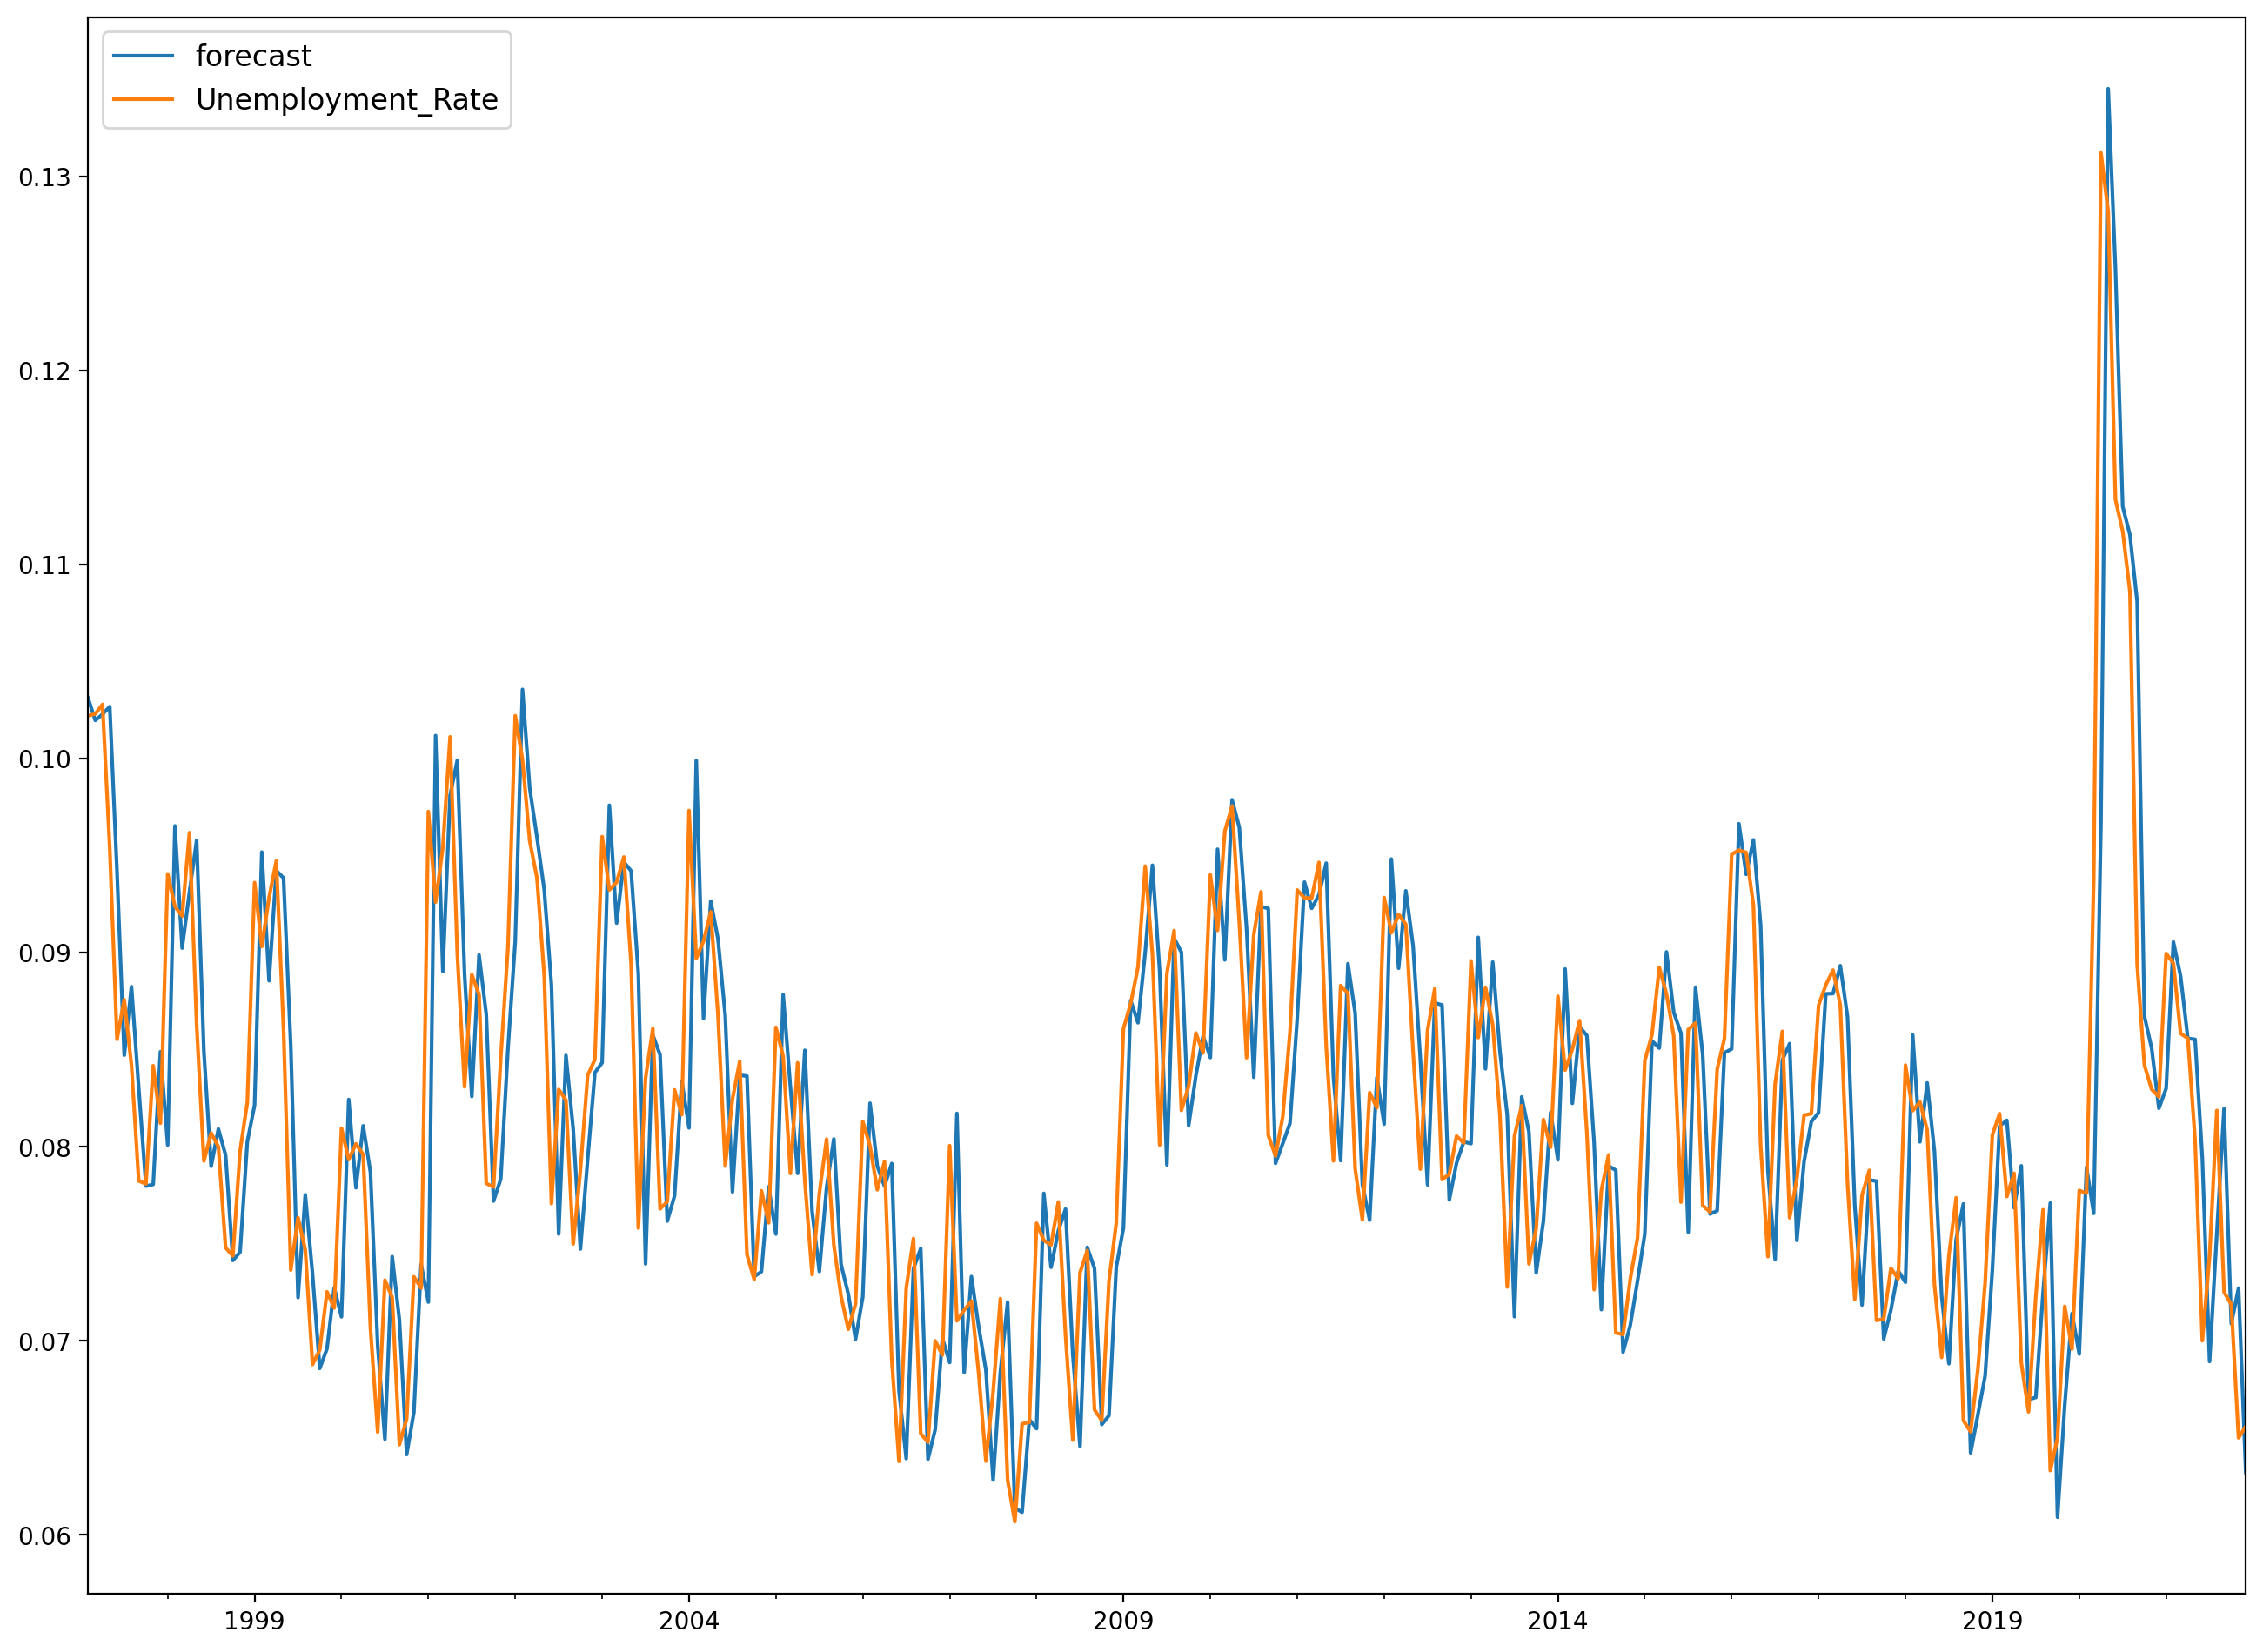

In [25]:
#Actual vs Fitted 
plt.rcParams.update({'figure.figsize':(16,12),'figure.dpi':200})
model_111_fit.plot_predict(dynamic=False)
plt.legend(loc='upper left', fontsize=12)
plt.show()

### Train and Test Model

In [26]:
size= int(len(df1['Unemployment_Rate'])*0.80)
train = df1['Unemployment_Rate'][0:size]
test =df1['Unemployment_Rate'][size:len(df1['Unemployment_Rate'])]


In [27]:
model_321 =ARIMA(train, order=(3,2,1))
fitted = model_321.fit(disp=-1)
print(fitted.summary())

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferr

                              ARIMA Model Results                               
Dep. Variable:     D2.Unemployment_Rate   No. Observations:                  238
Model:                   ARIMA(3, 2, 1)   Log Likelihood                 880.837
Method:                         css-mle   S.D. of innovations              0.006
Date:                  Mon, 04 Apr 2022   AIC                          -1749.674
Time:                          21:02:25   BIC                          -1728.840
Sample:                      03-01-1997   HQIC                         -1741.278
                           - 12-01-2016                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       4.171e-06      2e-05      0.209      0.834   -3.49e-05    4.33e-05
ar.L1.D2.Unemployment_Rate    -0.0734      0.056     -1.314      0.

In [28]:
#Forecast
fc, se, conf =fitted.forecast(60,alpha=0.05)
fc_series =pd.Series(fc, index=test.index)
lower_series =pd.Series(conf[1,0], index=test.index)
upper_series =pd.Series(conf[1,0], index=test.index)

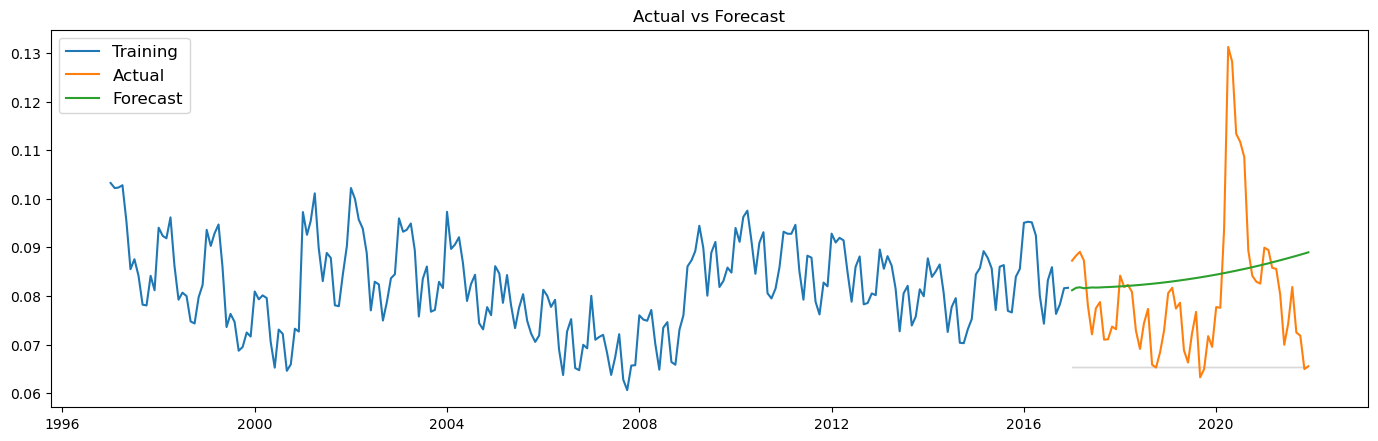

In [29]:
plt.figure(figsize=(17,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label ='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                color='k', alpha=0.15)
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [31]:
model_auto =pm.auto_arima(df1['Unemployment_Rate'], start_p = 1, start_q= 1,
                          test='adf',
                          max_p=3, max_q=3,
                          m=1,
                          d=None,
                          seasonal=False,
                          start_P =0,
                          D=0,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)
print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2158.629, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-644.617, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1022.527, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2165.908, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-2177.560, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-2206.088, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-2168.520, Time=0.16 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-2178.369, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-2173.588, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2212.693, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2187.986, Time=0.35 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : 

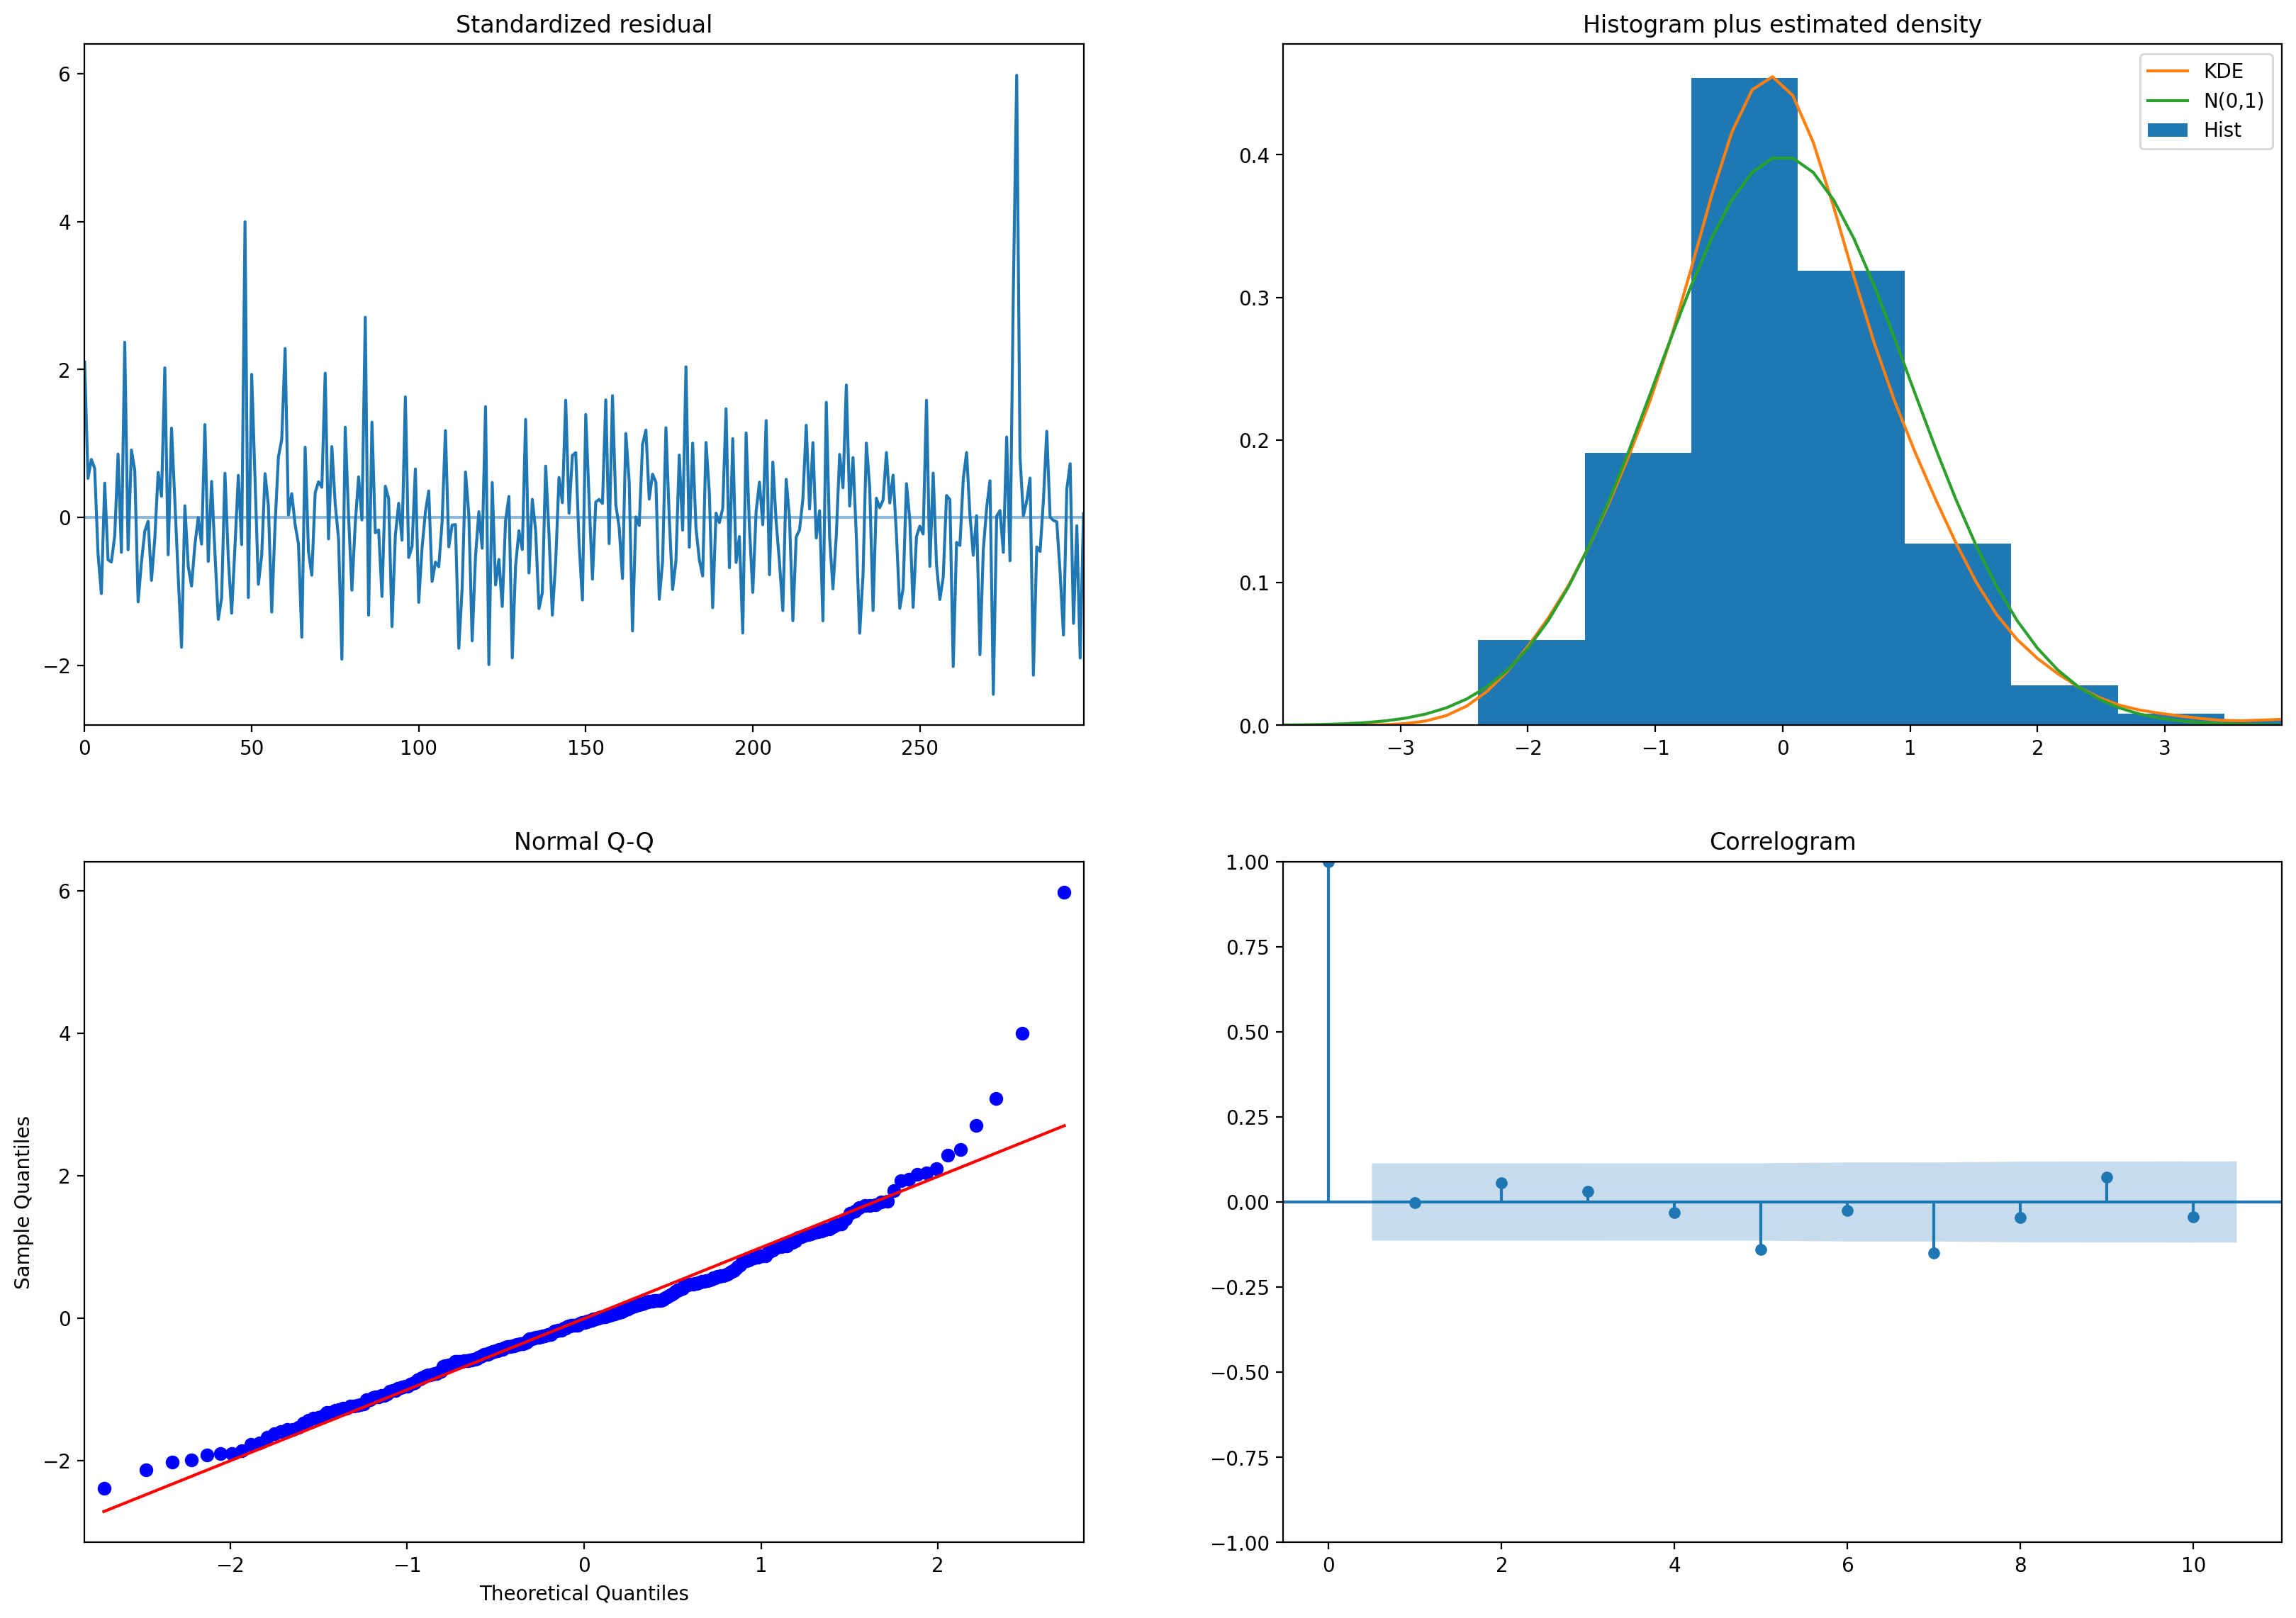

In [32]:
model_auto.plot_diagnostics(figsize=(20,14))
plt.show()

In [33]:
smodel =pm.auto_arima(df1['Unemployment_Rate'], start_p =1 , start_q =1,
                     test ='adf',
                     max_p = 3, max_q= 3, m=12,
                     start_P=0, seasonal=True,
                     d=None, D=1, trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-2407.917, Time=0.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-1778.145, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-2339.137, Time=0.38 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-2132.351, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-1779.473, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-2257.981, Time=0.19 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-2352.381, Time=0.39 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-2370.249, Time=0.39 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-2347.339, Time=0.42 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-2397.968, Time=1.27 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-2395.866, Time=1.13 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=-2379.756, Time=0.40 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-2410.269, Time=0.85 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-2265.049, Time=0.19 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  300
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                1211.134
Date:                              Mon, 04 Apr 2022   AIC                          -2410.269
Time:                                      21:03:52   BIC                          -2388.291
Sample:                                           0   HQIC                         -2401.461
                                              - 300                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.029e-05   8.39e-05     -0.481      0.631      -0.000       0.000
ar.L1          0.8031      0.047     17.165      0.000       0.711       0.895
ma.L1          0.4046      0.066      6.154      0.000       0.276       0.533
ma.L2          0.2470      0.074      3.354      0.001       0.103       0.391
ma.S.L12      -0.8434      0.059    -14.396      0.000      -0.958      -0.729
sigma2      1.225e-05   7.07e-07     17.332      0.000    1.09e-05    1.36e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):              9474.75
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             3.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

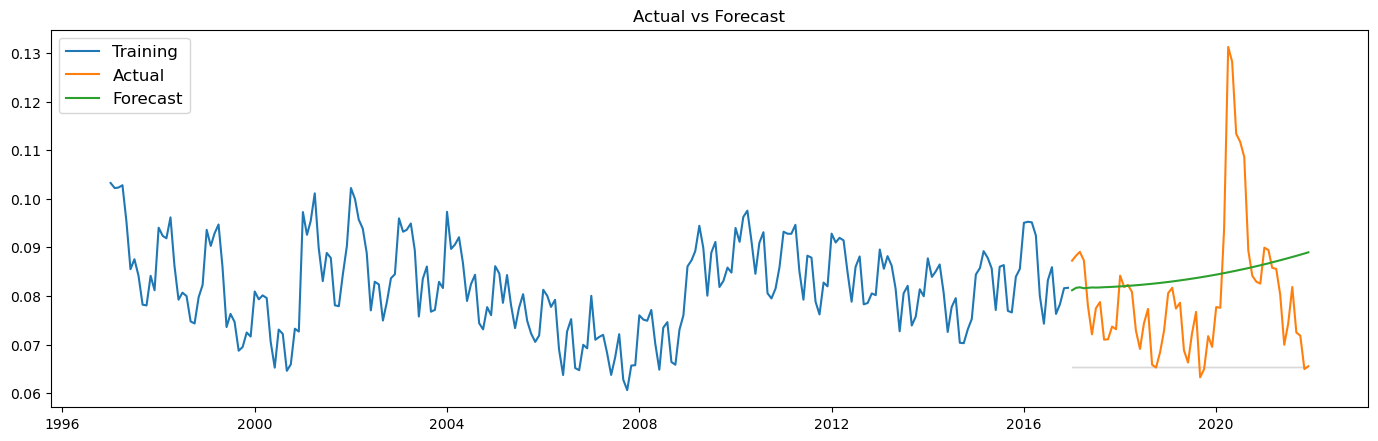

In [34]:
plt.figure(figsize=(17,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label ='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                color='k', alpha=0.15)
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=12)
plt.show()